In [1]:
## In this repo I want to test/ verify the laplace mechanism with the Kmeans clustering algorithm + optimization 
# Import require library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans

In [2]:
## Define the laplace mech => adding noise into the true_value

def laplace_mechanism(true_value, sensitivity, epsilon):
    scale = sensitivity / epsilon
    noise = np.random.laplace(loc=0, scale=scale)
    return true_value + noise

In [ ]:
# Load Breast Cancer dataset
# data, _ = load_breast_cancer(return_X_y=True)
# data = data[:, :2]  # Selecting only first 2 features for visualization

In [58]:
# Load data -> using the Breast cancer dataset from UCI
# Load the Breast Cancer Wisconsin (Diagnostic) dataset
data, labels = load_breast_cancer(return_X_y=True)

In [59]:
# data

In [60]:
# Privacy parameters
epsilon = 1.0  # Privacy parameter
sensitivity = 1.0  # Sensitivity of each coordinate

In [61]:
# Number of clusters
k = 2

In [62]:
# Maximum number of iterations for Lloyd's algorithm
max_iters = 10

In [63]:
# Apply Lloyd's algorithm with differential privacy
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.cluster_centers_ = data[np.random.choice(data.shape[0], k, replace=False)]

In [64]:
kmeans.cluster_centers_[:, 0]

array([12.21, 14.53])

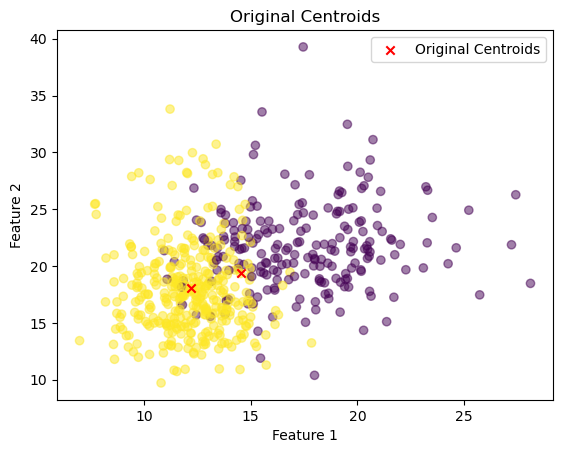

In [65]:
# Plot original centroids
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', label='Original Centroids')
plt.title('Original Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [66]:
np.random.rand(2, 2)

array([[0.37461724, 0.620517  ],
       [0.81797892, 0.98563381]])

In [67]:
# ## DP LLouy's

# def dp_lloyds_algorithm(data, k, epsilon, T):
#     n, d = data.shape
#     sensitivity_n = 2
#     sensitivity_a = 2

#     # Initialize centroids randomly
#     controids = [kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1]]
# #     centroids = np.random.rand(k, d)
# #     kmeans = KMeans(n_clusters=k, random_state=42)
# #     kmeans.cluster_centers_ = data[np.random.choice(data.shape[0], k, replace=False)]
    
#     for t in range(T):
# #         # Plot original centroids and data points
# #         plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Data Points')
# #         plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', label='Original Centroids')
# #         plt.title(f'Original Centroids and Data Points (Step {t})')
# #         plt.xlabel('Feature 1')
# #         plt.ylabel('Feature 2')
# #         plt.legend()
# #         plt.show()

#         for j in range(k):
#             # Find the closest current center to each point
#             distances = np.linalg.norm(data - centroids[j], axis=1)
#             Sj = [i for i in range(n) if distances[i] == min(distances)]
#             nj = len(Sj)

#             # Calculate aj
#             aj = np.sum(data[Sj], axis=0)

#             # Add Laplace noise to nj and aj
#             n_hat_j = laplace_mechanism(nj, sensitivity_n, epsilon / (2 * T))
#             a_hat_j = laplace_mechanism(aj, sensitivity_a, epsilon / (2 * T))

#             # Update centroids
#             if n_hat_j >= 1:
#                 centroids[j] = a_hat_j / n_hat_j
#             else:
#                 centroids[j] = np.random.rand(d)

#         # Plot data points, original centroids, and DP centroids
#         plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.5)
#         plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', label='Original Centroids')
#         plt.scatter(dp_centroids[:, 0], dp_centroids[:, 1], marker='o', color='blue', label='DP Centroids')
#         plt.title(f'Original and DP Centroids with Data Points (Step {t})')
#         plt.xlabel('Feature 1')
#         plt.ylabel('Feature 2')
#         plt.legend()
#         plt.show()

#     return centroids

In [93]:
def dp_lloyds_algorithm(data, k, epsilon, T):
    n, d = data.shape
    sensitivity_n = 2
    sensitivity_a = 2
    orig_centroids = kmeans.cluster_centers_ = data[np.random.choice(data.shape[0], k, replace=False)]
    # Initialize centroids using KMeans
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(data)
#     orig_centroids = kmeans.cluster_centers_
    
    for t in range(T):
        for j in range(k):
            # Find the closest current center to each point
            distances = np.linalg.norm(data - centroids[j], axis=1)
            Sj = [i for i in range(n) if distances[i] == min(distances)]
            nj = len(Sj)

            # Calculate aj
            aj = np.sum(data[Sj], axis=0)

            # Add Laplace noise to nj and aj
            n_hat_j = laplace_mechanism(nj, sensitivity_n, epsilon / (2 * T))
            a_hat_j = laplace_mechanism(aj, sensitivity_a, epsilon / (2 * T))

            # Update centroids
            if n_hat_j >= 1:
                dp_centroids[j] = a_hat_j / n_hat_j
            else:
                dp_centroids[j] = np.random.rand(d)

        # Plot data points, original centroids, and DP centroids
        plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.5)
        plt.scatter(orig_centroids[:, 0], orig_centroids[:, 1], marker='x', color='red', label='Original Centroids')
        plt.scatter(dp_centroids[:, 0], dp_centroids[:, 1], marker='o', color='blue', label='DP Centroids')
        plt.title(f'Original and DP Centroids with Data Points (Step {t})')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

    return centroids

In [94]:
k = 2  # Number of clusters
epsilon = 100  # Privacy parameter
T = 20  # Number of iterations

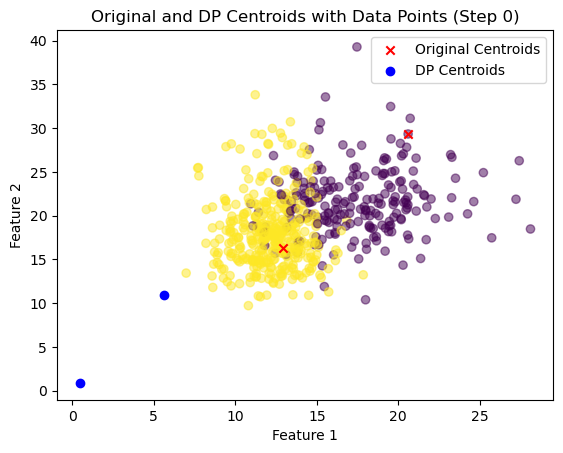

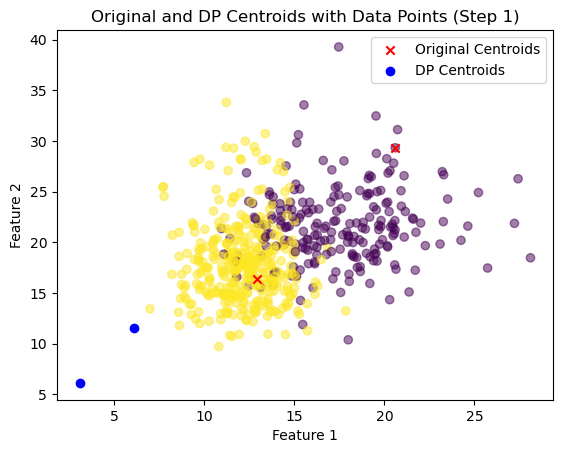

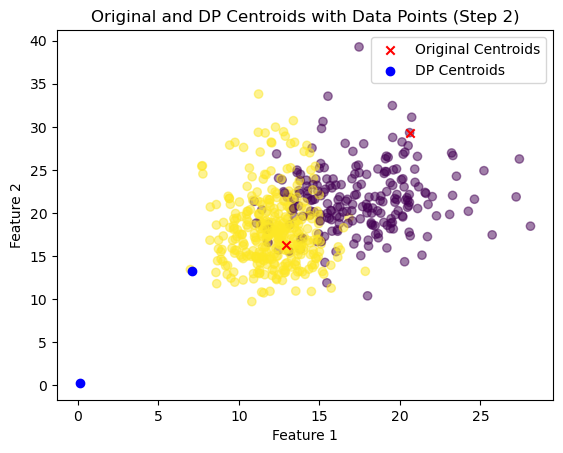

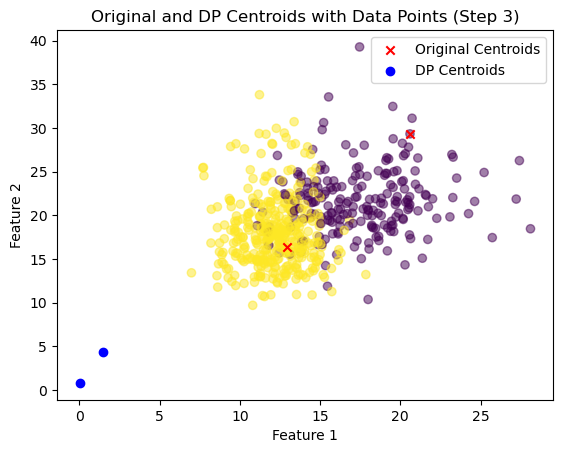

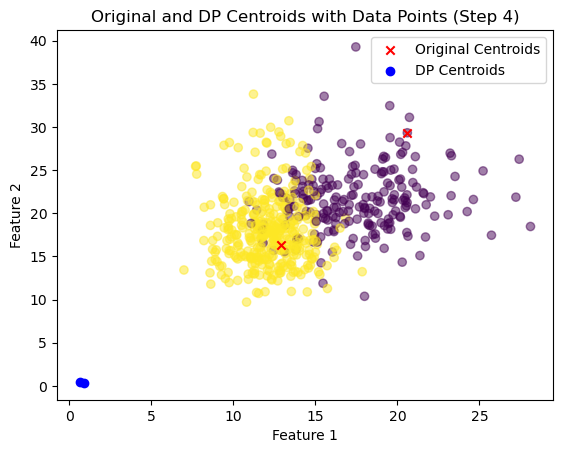

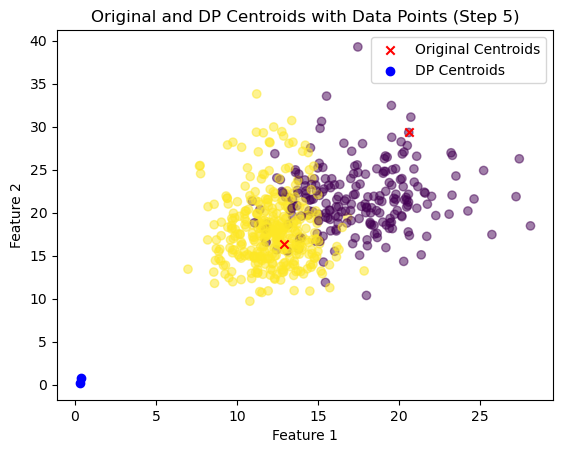

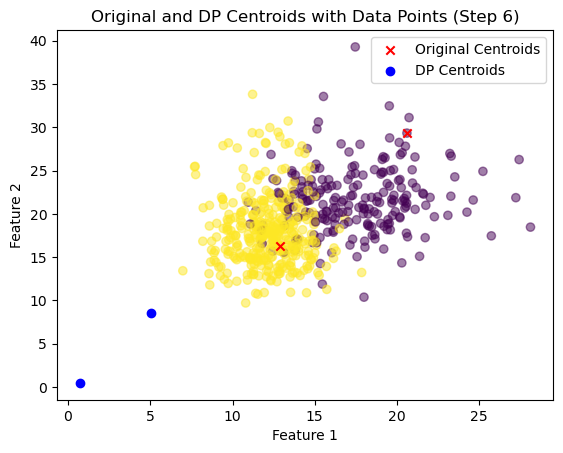

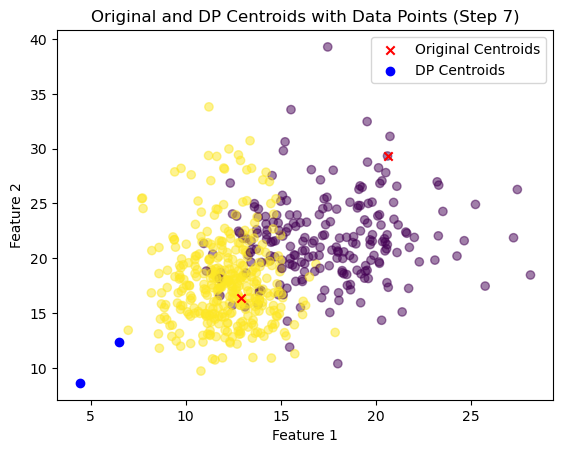

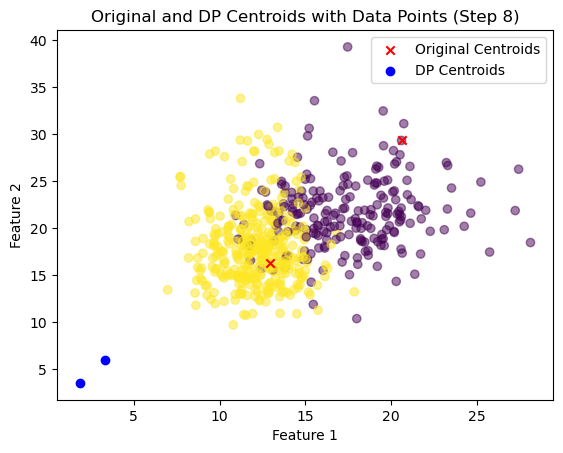

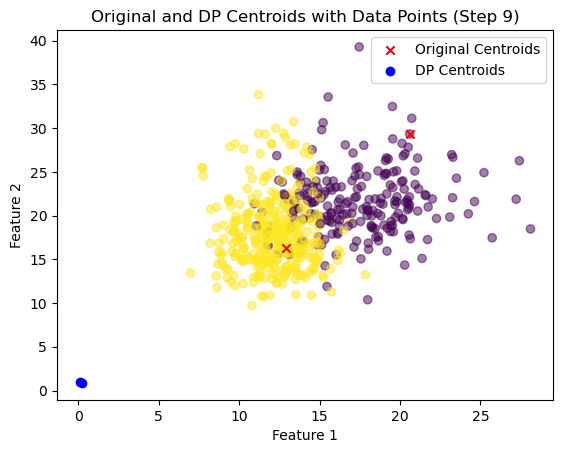

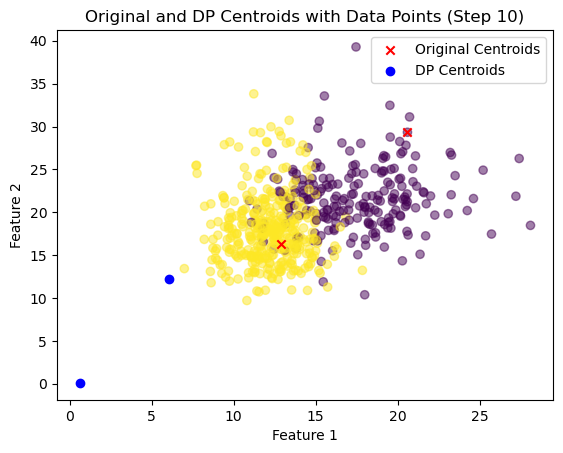

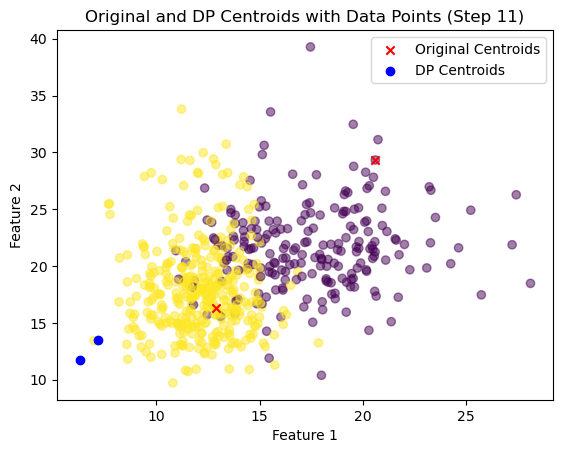

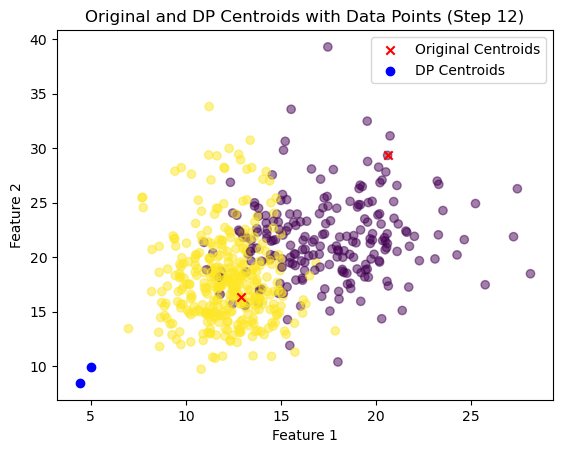

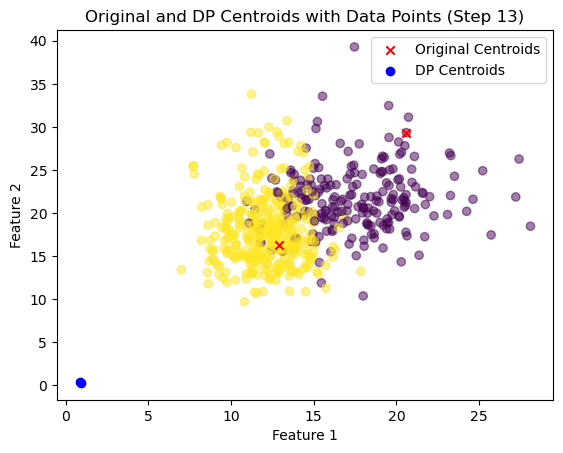

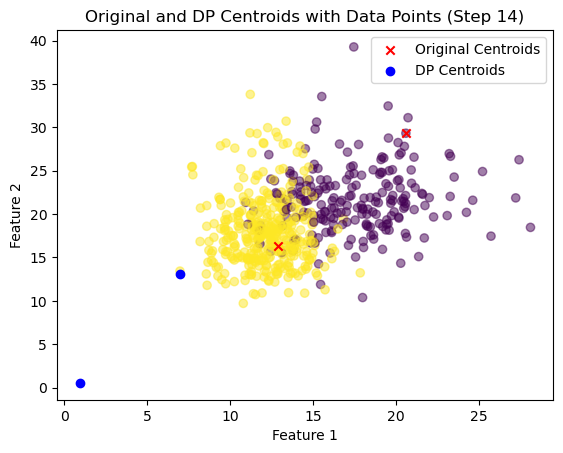

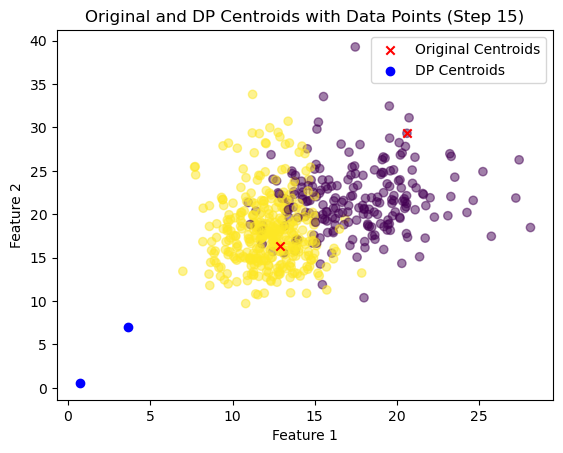

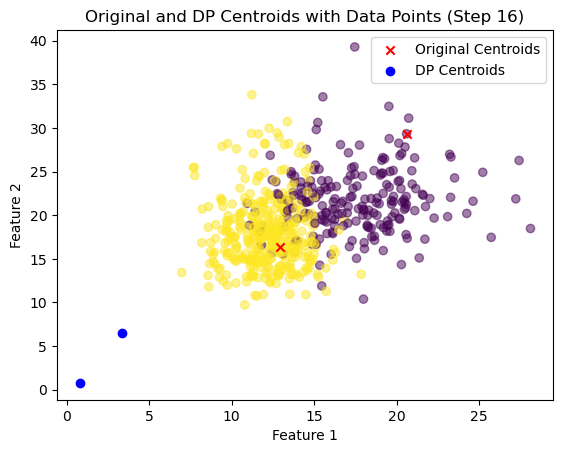

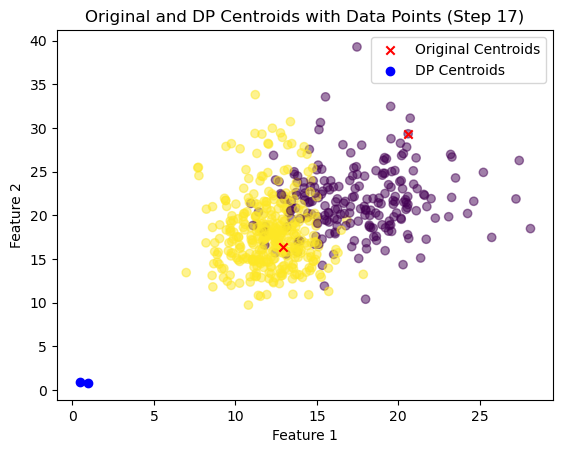

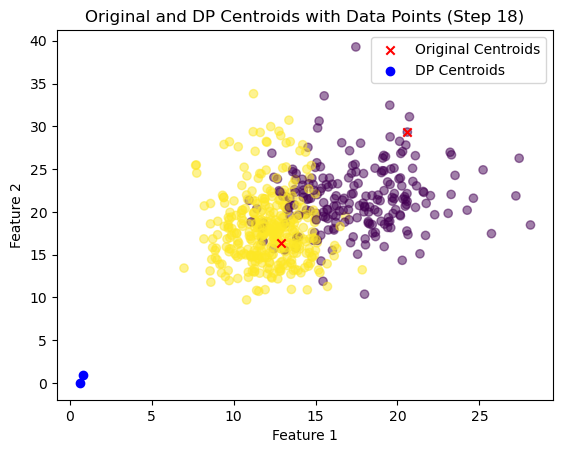

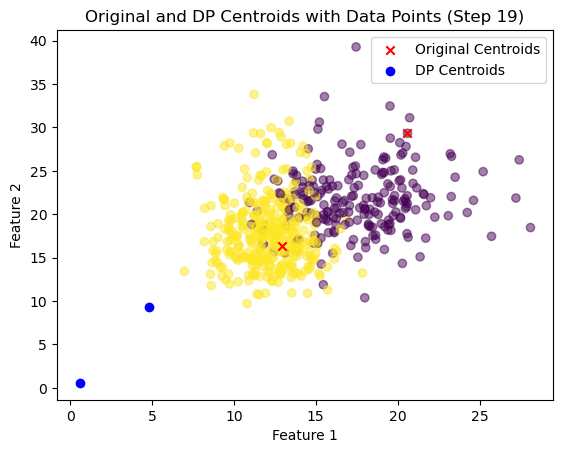

Differentially Private Centroids:
[[ 4.83153025e+00  9.35500980e+00  3.06502244e+01  1.00589152e+02
   1.69599861e-02 -1.20228290e-02 -6.51065524e-02 -6.51065524e-02
   7.02681651e-02 -1.02692705e-02  9.20824330e-02  9.92639945e-01
   1.02420400e+00  6.83198981e+00 -5.79590479e-02 -5.75031227e-02
  -6.51065524e-02 -6.51065524e-02 -4.64557040e-02 -6.22307165e-02
   5.49718106e+00  1.36407068e+01  3.52936474e+01  1.29838508e+02
   4.59989152e-02  1.92045411e-02 -6.51065524e-02 -6.51065524e-02
   1.40550790e-01  7.00991583e-04]
 [ 5.75866787e-01  5.68304033e-01  7.10780352e-01  3.76518778e-01
   4.43395516e-02  6.51659304e-01  4.25396859e-01  3.63951603e-01
   6.26294804e-01  8.89838507e-01  4.19636391e-01  8.47750321e-01
   1.85326160e-01  9.07595603e-01  2.15191084e-01  3.15325368e-01
   4.72315528e-01  7.73671379e-01  8.23887772e-01  9.49187618e-02
   5.58209992e-01  1.72011954e-01  3.26110733e-01  9.08869180e-01
   7.45881184e-01  9.24972817e-01  9.86182485e-01  3.45763056e-02
   5.27

In [95]:

dp_centroids = dp_lloyds_algorithm(data, k, epsilon, T)
print("Differentially Private Centroids:")
print(dp_centroids)

In [81]:
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)
centroids = kmeans.cluster_centers_

## Using the random generated data

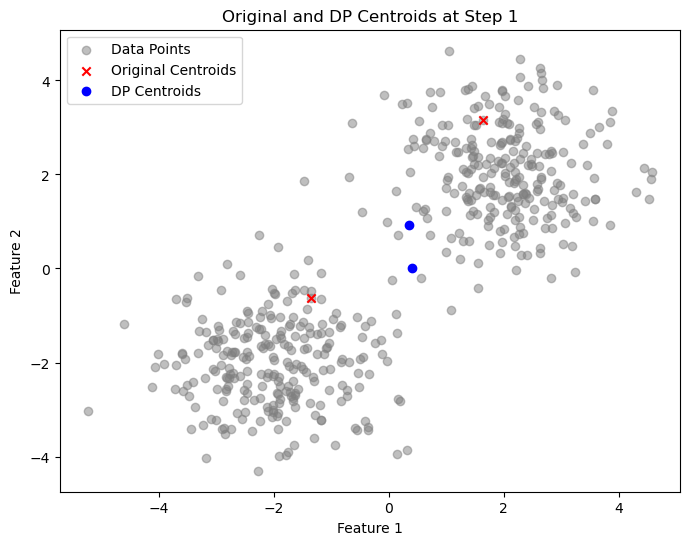

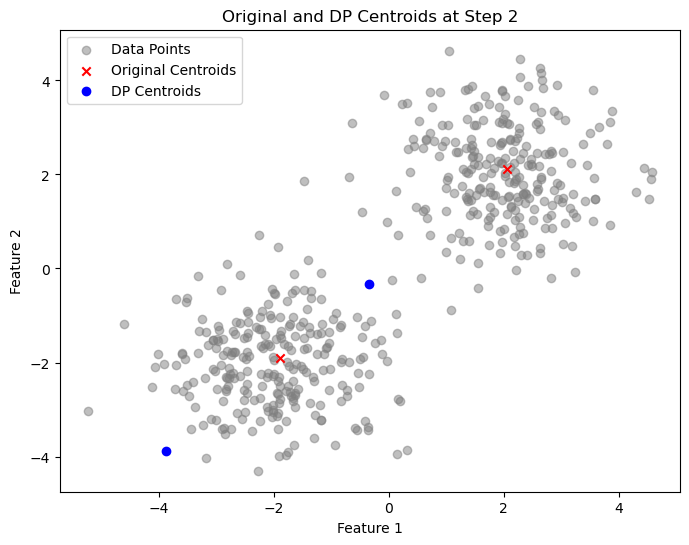

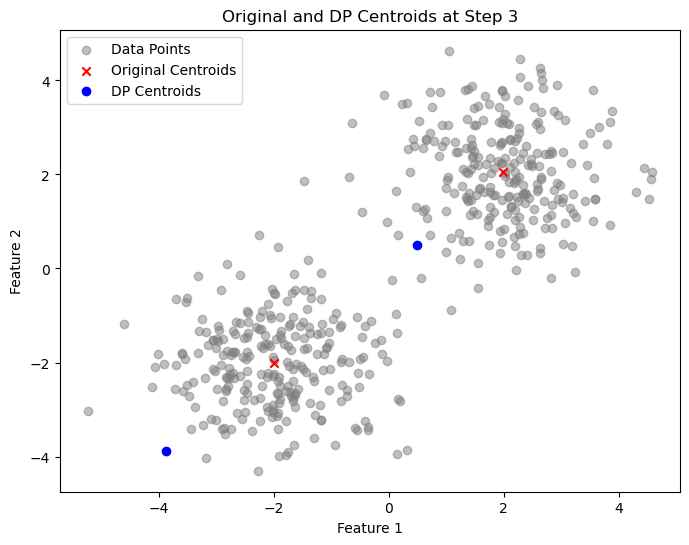

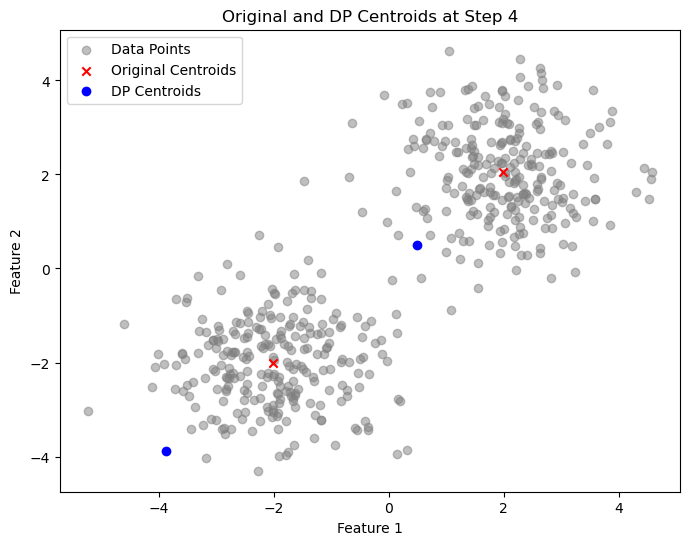

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def lloyds_algorithm(data, k, max_iters):
    n, d = data.shape
    
    # Initialize centroids randomly
    centroids = data[np.random.choice(n, k, replace=False)]
    
    # Initialize list to store centroids at each step
    centroid_history = [centroids.copy()]  # Store initial centroids
    
    for iter_step in range(max_iters):
        # Assign each data point to the nearest centroid
        labels = np.argmin(np.linalg.norm(data[:, None] - centroids, axis=2), axis=1)
        
        # Compute new centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids
        centroid_history.append(centroids.copy())  # Store centroids for this iteration
    
    return centroid_history

def laplace_mechanism(true_value, sensitivity, epsilon):
    scale = sensitivity / epsilon
    noise = np.random.laplace(loc=0, scale=scale)
    return true_value + noise

def dp_lloyds_algorithm(data, k, epsilon, max_iters):
    n, d = data.shape
    sensitivity_n = 2
    sensitivity_a = 2
    
    # Initialize centroids randomly
    centroids = np.random.rand(k, d)
    
    # Initialize list to store differentially private centroids at each step
    dp_centroid_history = [centroids.copy()]  # Store initial centroids
    
    for iter_step in range(max_iters):
        # Assign each data point to the nearest centroid
        labels = np.argmin(np.linalg.norm(data[:, None] - centroids, axis=2), axis=1)
        
        # Compute new centroids with Laplace noise
        for j in range(k):
            # Find the closest current center to each point
            distances = np.linalg.norm(data - centroids[j], axis=1)
            Sj = [i for i in range(n) if distances[i] == min(distances)]
            nj = len(Sj)

            # Calculate aj
            aj = np.sum(data[Sj], axis=0)

            # Add Laplace noise to nj and aj
            n_hat_j = laplace_mechanism(nj, sensitivity_n, epsilon / (2 * max_iters))
            a_hat_j = laplace_mechanism(aj, sensitivity_a, epsilon / (2 * max_iters))

            # Update centroids
            if n_hat_j >= 1:
                centroids[j] = a_hat_j / n_hat_j
            else:
                centroids[j] = np.random.rand(d)
#                 centroids[j] = (dp_centroid_history[-1])[j]
                
        
        dp_centroid_history.append(centroids.copy())  # Store centroids for this iteration
    
    return dp_centroid_history

# Generate synthetic data with distinct clusters
n_samples = 500
n_features = 2
centers = [[-2, -2], [2, 2]]
cluster_std = [1.0, 1.0]
data, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cluster_std, random_state=42)

# Set parameters
k = len(centers)
epsilon = 5
max_iters = 100

# Run original Lloyd's algorithm
original_centroid_history = lloyds_algorithm(data, k, max_iters)

# Run differentially private Lloyd's algorithm
dp_centroid_history = dp_lloyds_algorithm(data, k, epsilon, max_iters)

# Plot centroids for each step
for step in range(min(len(original_centroid_history), len(dp_centroid_history))):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c='grey', alpha=0.5, label='Data Points')
    plt.scatter(original_centroid_history[step][:, 0], original_centroid_history[step][:, 1], marker='x', color='red', label='Original Centroids')
    plt.scatter(dp_centroid_history[step][:, 0], dp_centroid_history[step][:, 1], marker='o', color='blue', label='DP Centroids')
    plt.title(f'Original and DP Centroids at Step {step + 1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


# Test in other dataset

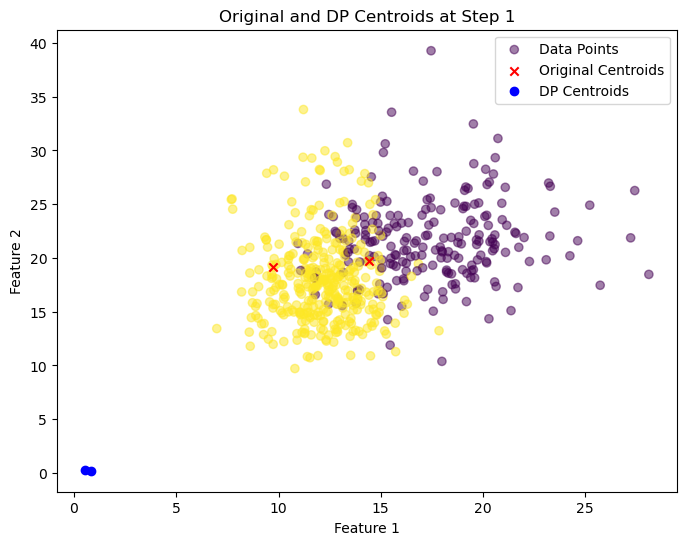

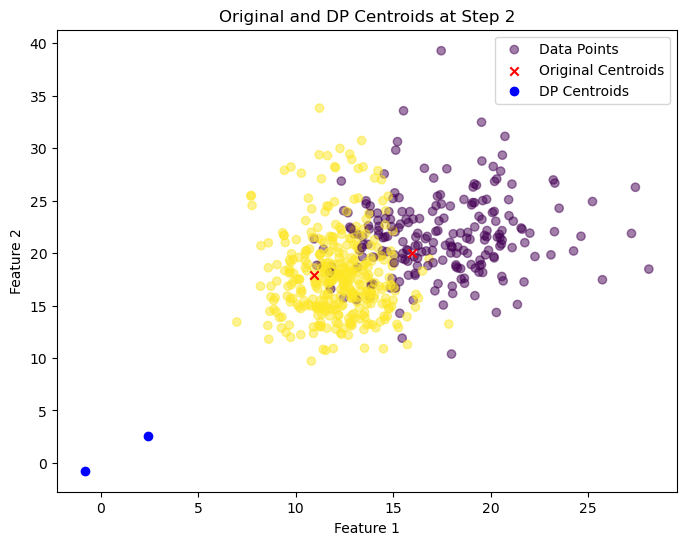

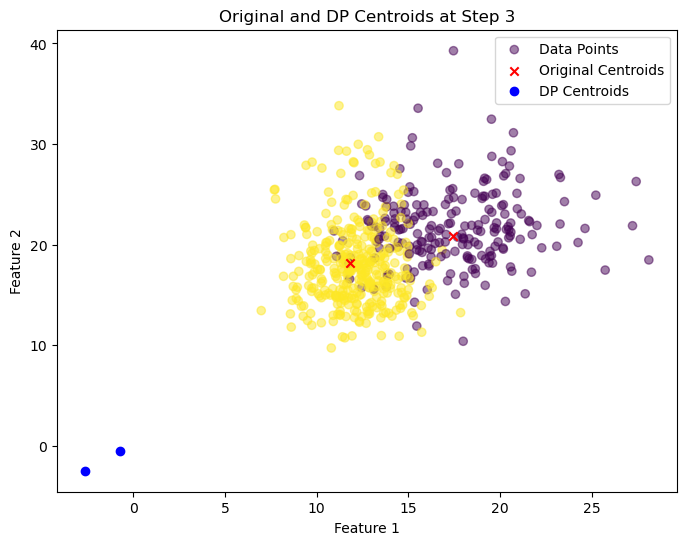

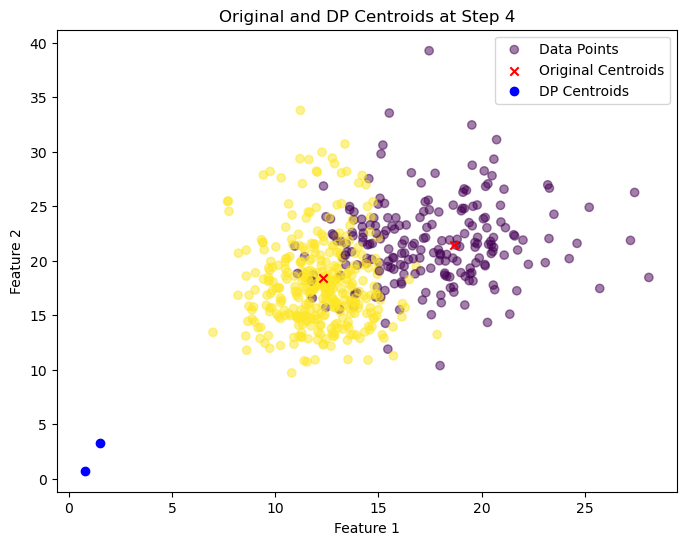

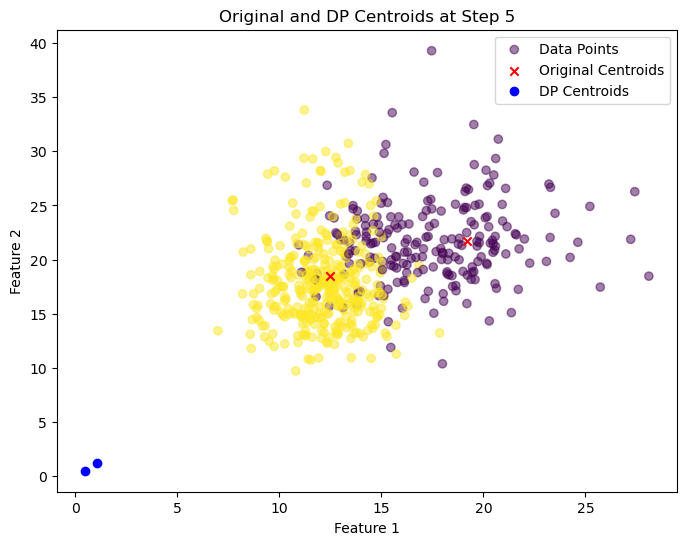

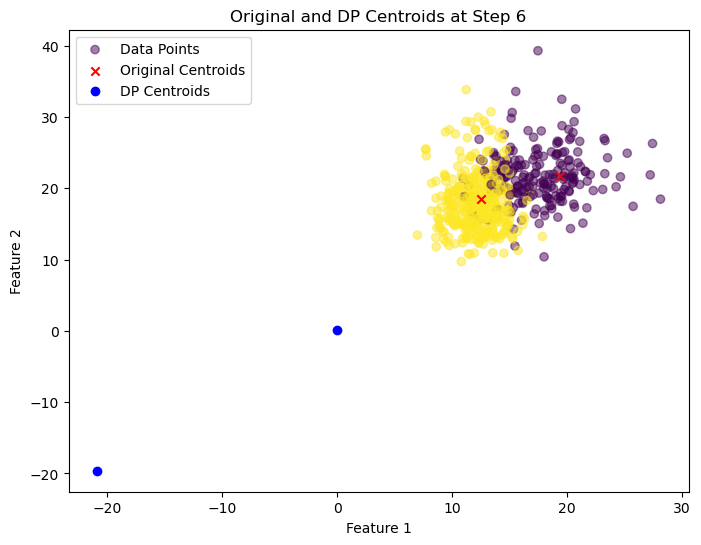

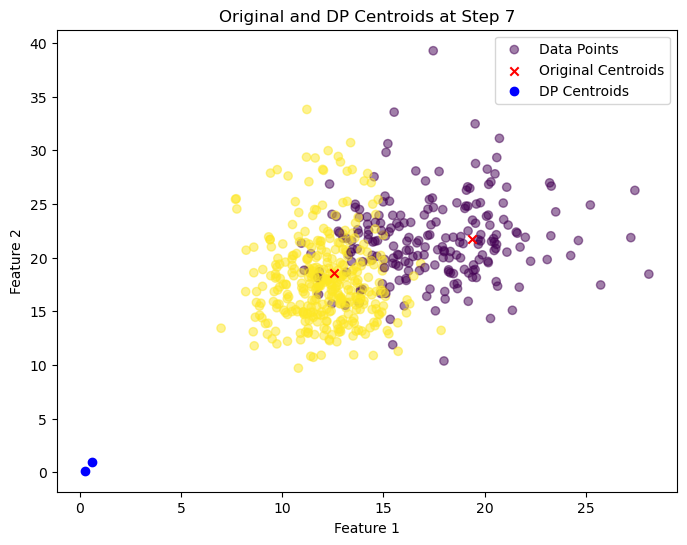

In [126]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target variable

# Set parameters
k = 2
epsilon = 5
max_iters = 100

# Run Lloyd's algorithm
original_centroid_history = lloyds_algorithm(X, k, max_iters)

# Run differentially private Lloyd's algorithm
dp_centroid_history = dp_lloyds_algorithm(X, k, epsilon, max_iters)

# Plot centroids for each step
for step in range(min(len(original_centroid_history), len(dp_centroid_history))):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.5, label='Data Points')
    plt.scatter(original_centroid_history[step][:, 0], original_centroid_history[step][:, 1], marker='x', color='red', label='Original Centroids')
    plt.scatter(dp_centroid_history[step][:, 0], dp_centroid_history[step][:, 1], marker='o', color='blue', label='DP Centroids')
    plt.title(f'Original and DP Centroids at Step {step + 1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


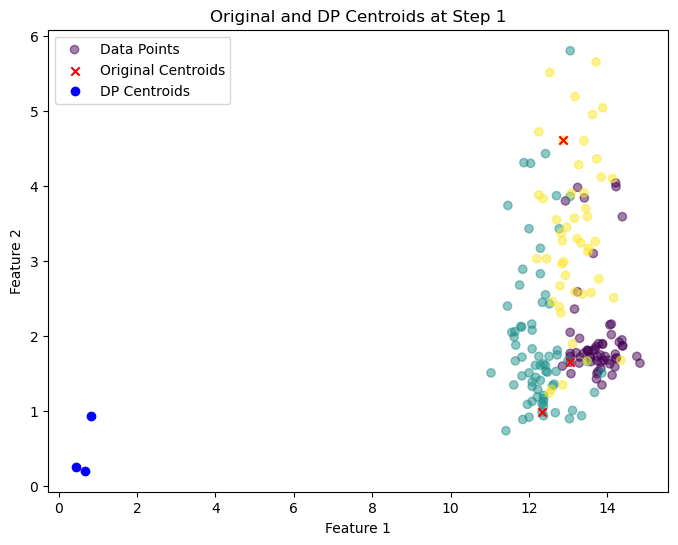

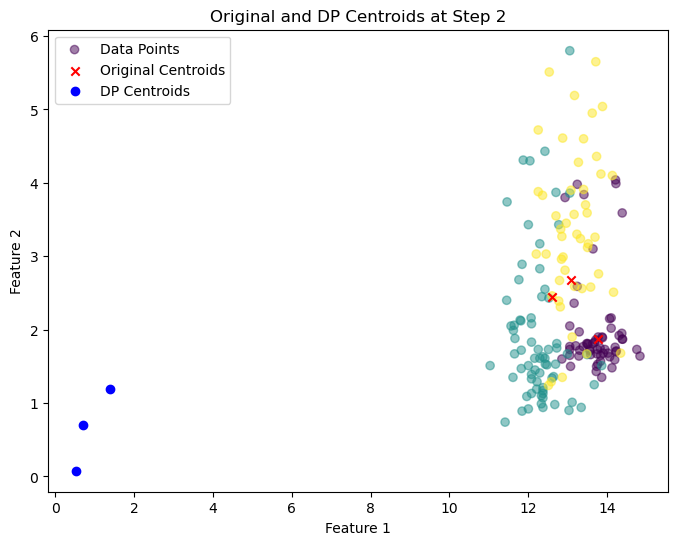

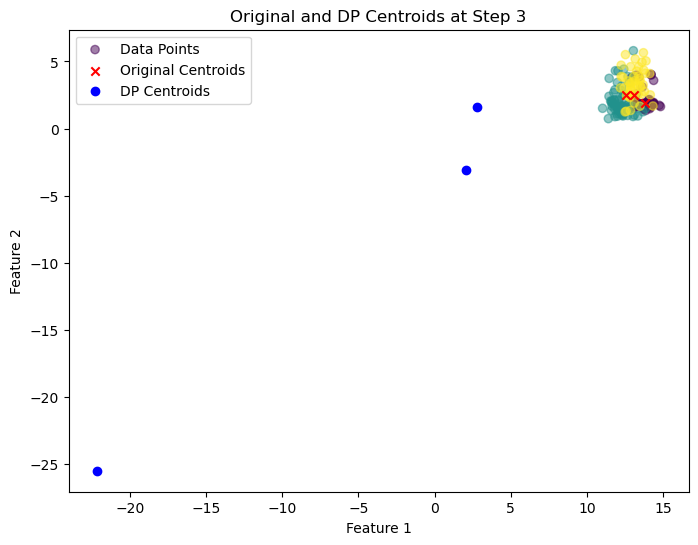

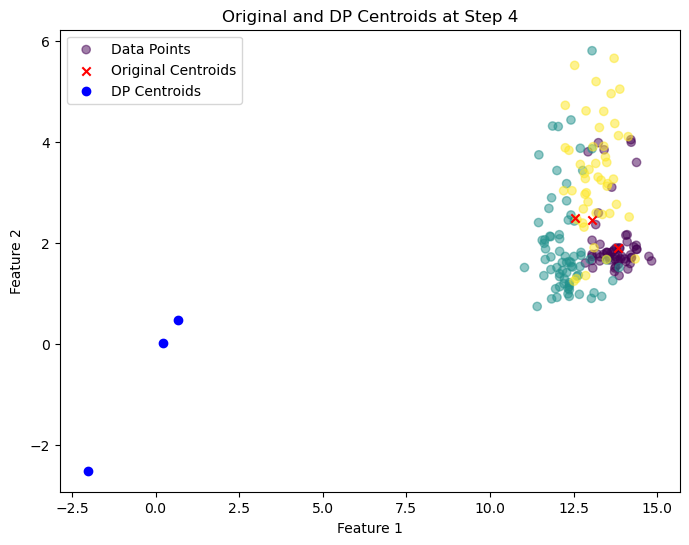

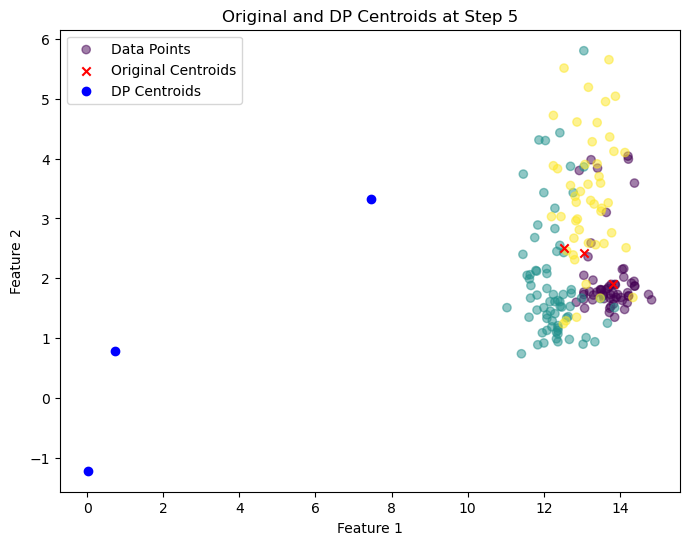

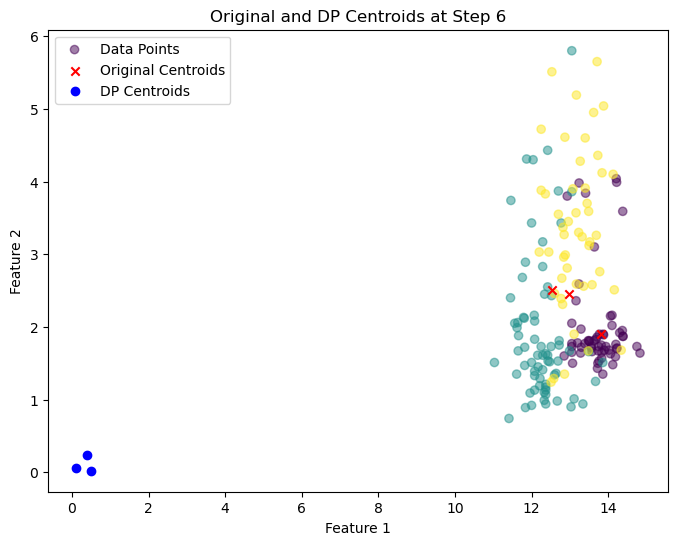

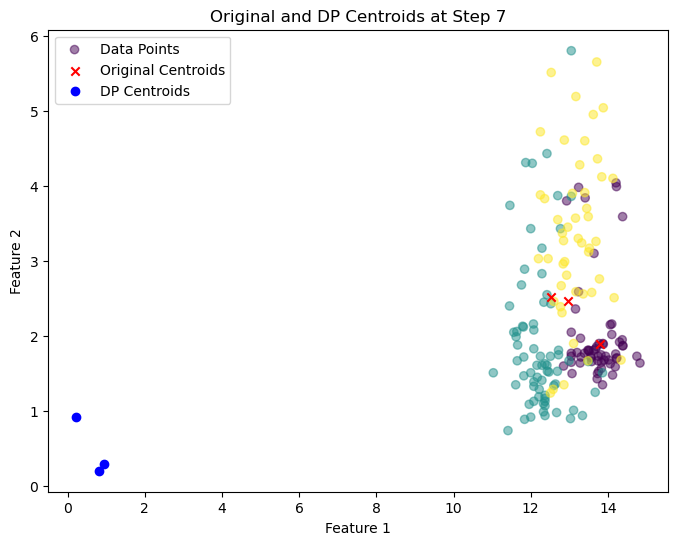

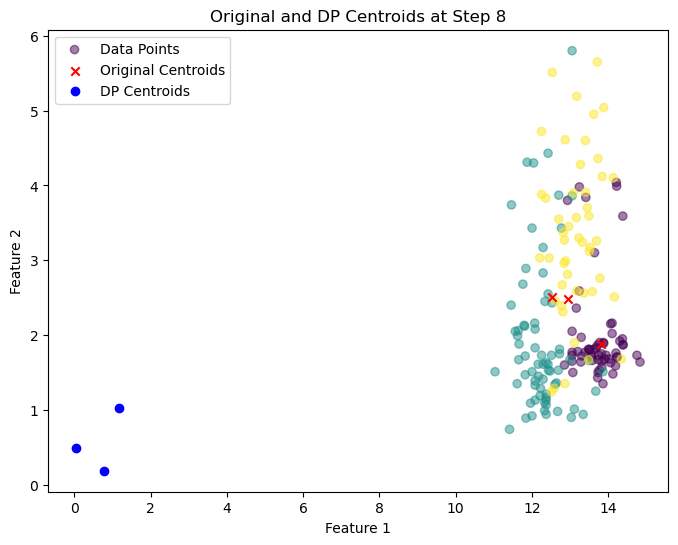

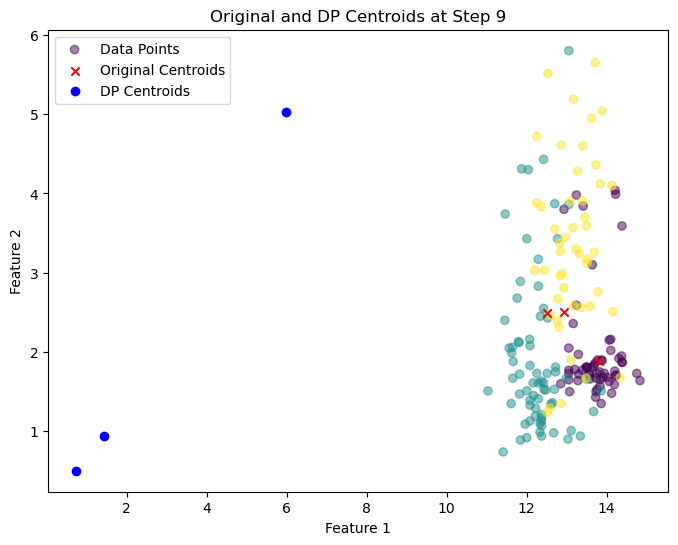

In [124]:
from sklearn.datasets import load_wine

# Load the Wine dataset
data = load_wine()
X = data.data  # Features
y = data.target  # Target variable

# Set parameters
k = 3
epsilon = 1.0
max_iters = 10

# Run Lloyd's algorithm
original_centroid_history = lloyds_algorithm(X, k, max_iters)

# Run differentially private Lloyd's algorithm
dp_centroid_history = dp_lloyds_algorithm(X, k, epsilon, max_iters)

# Plot centroids for each step
for step in range(min(len(original_centroid_history), len(dp_centroid_history))):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.5, label='Data Points')
    plt.scatter(original_centroid_history[step][:, 0], original_centroid_history[step][:, 1], marker='x', color='red', label='Original Centroids')
    plt.scatter(dp_centroid_history[step][:, 0], dp_centroid_history[step][:, 1], marker='o', color='blue', label='DP Centroids')
    plt.title(f'Original and DP Centroids at Step {step + 1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


## Estimate the result